📁 Loading dataset from: ..\data\raw\reviews\fake_reviews.csv
✅ Loaded 40432 reviews
📋 Columns: ['category', 'rating', 'label', 'text_']

📊 DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB

🔍 MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

🏷️  LABEL DISTRIBUTION
label
CG    20216
OR    20216
Name: count, dtype: int64

Fake reviews: 20216 (50.0%)
Real reviews: 20216 (50.0%)


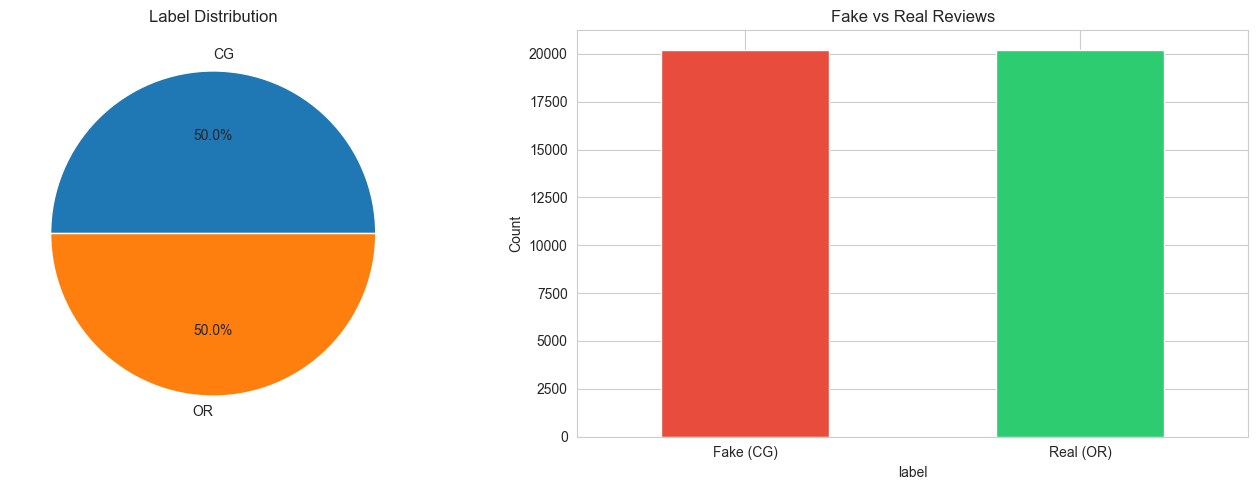


⭐ RATING DISTRIBUTION
rating
1.0     2155
2.0     1967
3.0     3786
4.0     7965
5.0    24559
Name: count, dtype: int64

📊 Ratings by Label:
rating   1.0   2.0   3.0   4.0    5.0
label                                
CG      1063   962  1952  3920  12319
OR      1092  1005  1834  4045  12240


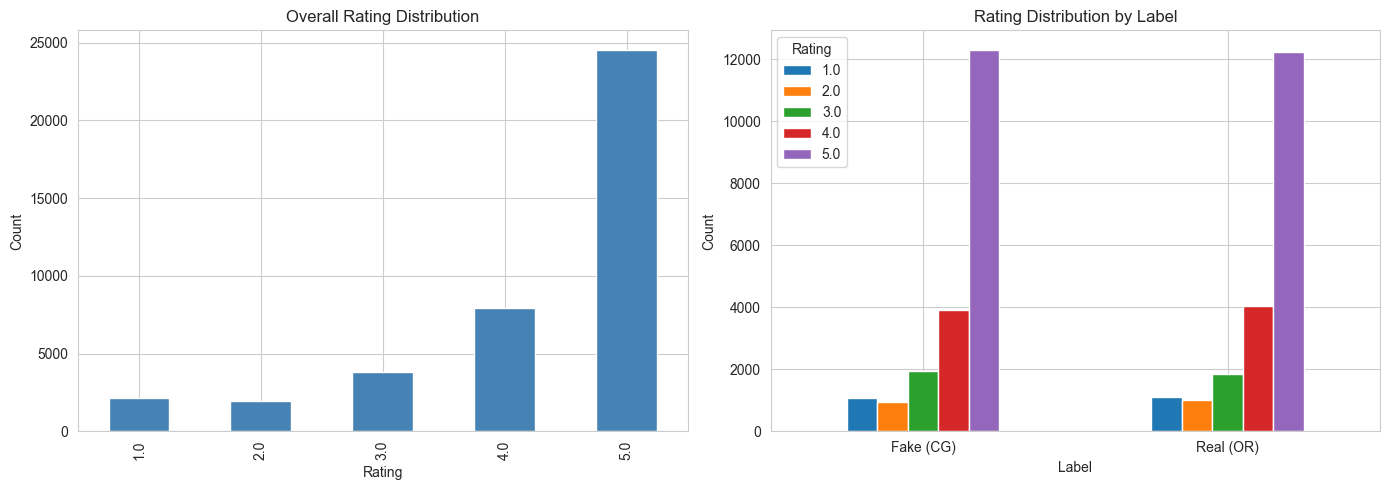


📦 CATEGORY DISTRIBUTION
category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64


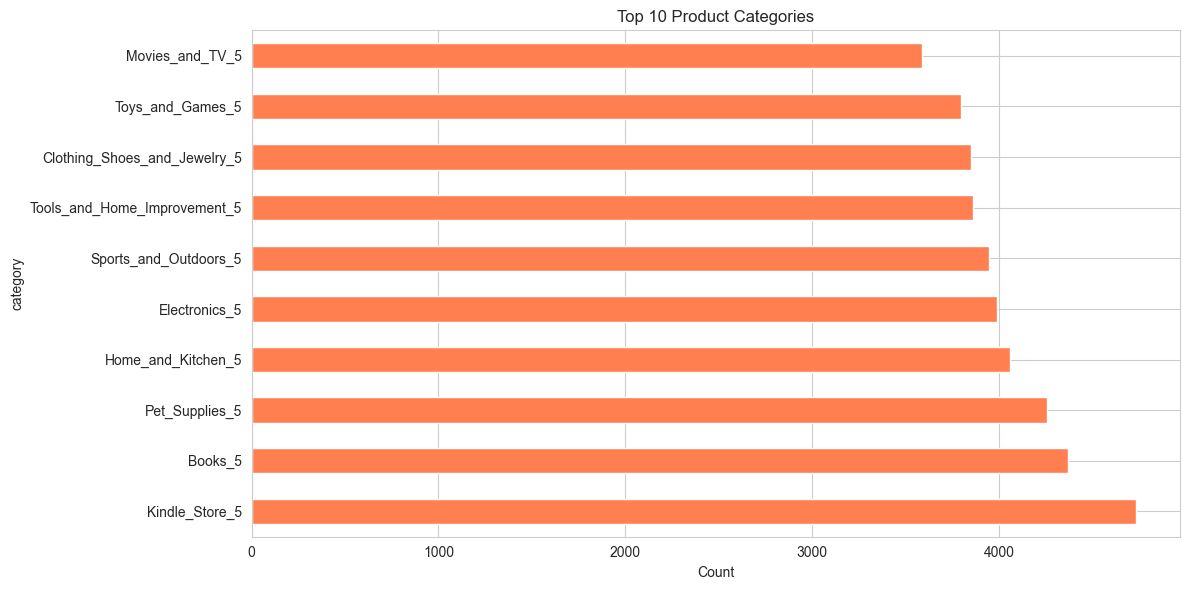


📝 TEXT LENGTH ANALYSIS
      text_length                                                             \
            count        mean         std   min    25%    50%    75%     max   
label                                                                          
CG        20216.0  305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0   
OR        20216.0  396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0   

      word_count                                                      
           count       mean        std  min   25%   50%   75%    max  
label                                                                 
CG       20216.0  61.288237  61.799015  1.0  19.0  35.0  77.0  318.0  
OR       20216.0  73.642610  76.078420  5.0  23.0  42.0  93.0  373.0  


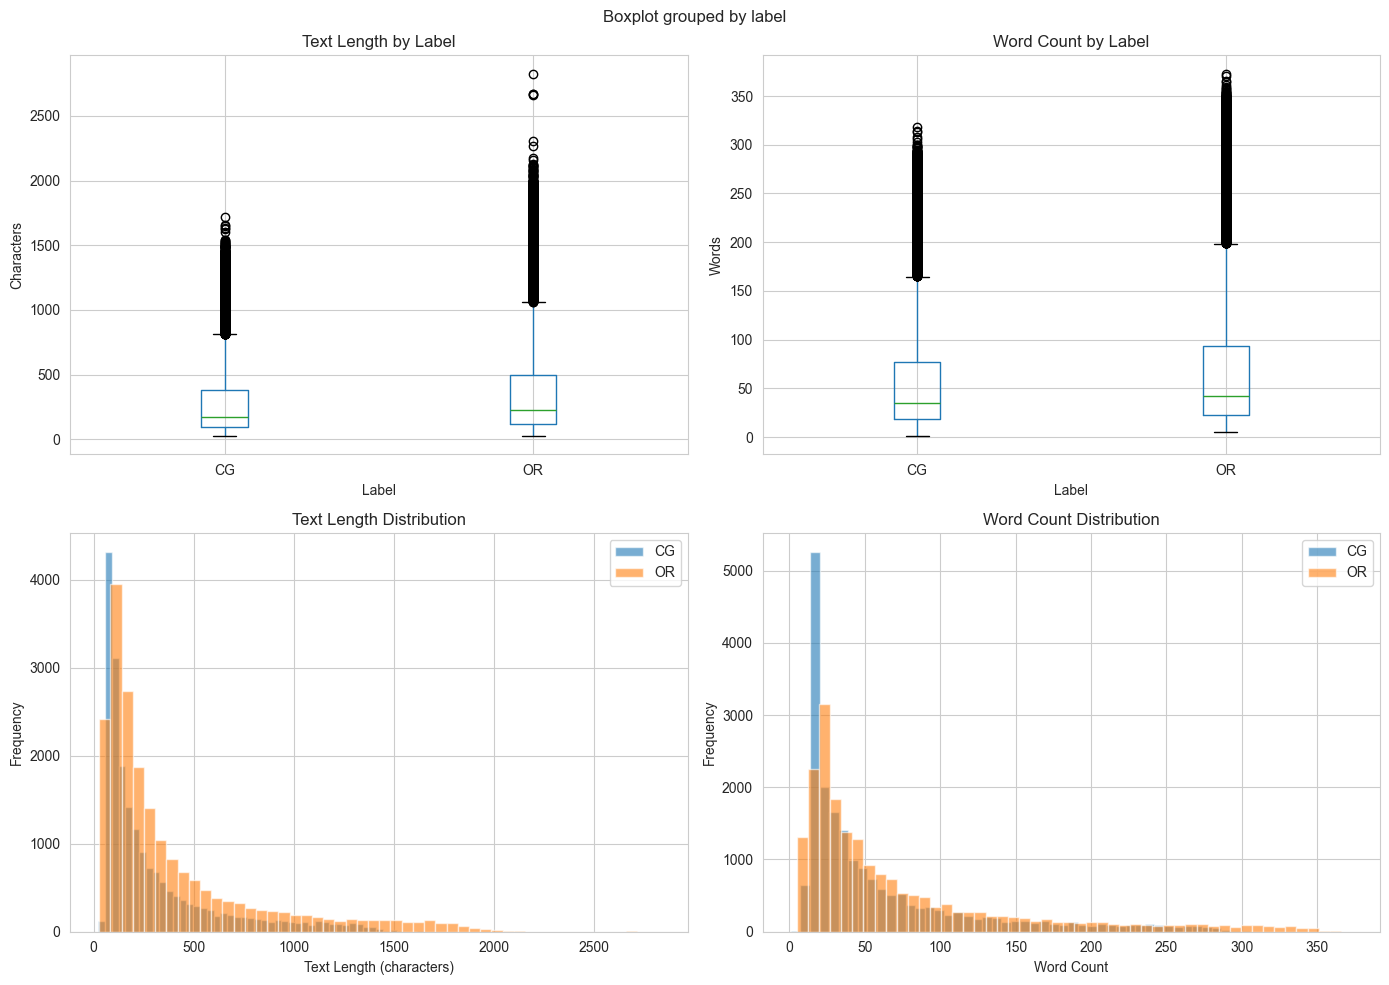


📄 SAMPLE FAKE REVIEWS

Review 4712:
Rating: 5.0
Category: Sports_and_Outdoors_5
Text: As advertised.  Cold for a couple of hours and comfortable.  Also, it's been used...
----------------------------------------------------------------------

Review 34458:
Rating: 3.0
Category: Toys_and_Games_5
Text: It was a great item and a great gift.Very cute.  My 2 year old loves to play with it.  I am a bit of a game addict...
----------------------------------------------------------------------

Review 28481:
Rating: 5.0
Category: Books_5
Text: All Cornwell's novels are great. I love the way they are written....
----------------------------------------------------------------------

📄 SAMPLE REAL REVIEWS

Review 39565:
Rating: 4.0
Category: Clothing_Shoes_and_Jewelry_5
Text: Besides being very narrow thru the middle of my foot where the laces are, everywhere else fit wonderfully.  I thought they have great arch support as well.  Hoping it might loosen up some with walking...
------------------

In [2]:
"""
02 - Fake Reviews Dataset - Exploratory Data Analysis
"""

# %%
# Imports
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# %%
# Load dataset
dataset_path = Path('../data/raw/reviews/fake_reviews.csv')

print(f"📁 Loading dataset from: {dataset_path}")

df = pd.read_csv(dataset_path)

print(f"✅ Loaded {len(df)} reviews")
print(f"📋 Columns: {list(df.columns)}")

# %%
# Display first rows
df.head(10)

# %%
# Dataset info
print("\n📊 DATASET INFO")
print("="*70)
df.info()

# %%
# Check for missing values
print("\n🔍 MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print(missing_df[missing_df['Missing Count'] > 0])

# %%
# Label distribution
print("\n🏷️  LABEL DISTRIBUTION")
print("="*70)

label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nFake reviews: {label_counts.get('CG', 0)} ({label_counts.get('CG', 0)/len(df)*100:.1f}%)")
print(f"Real reviews: {label_counts.get('OR', 0)} ({label_counts.get('OR', 0)/len(df)*100:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
label_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Label Distribution')
axes[0].set_ylabel('')

# Bar chart
label_counts.plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Fake vs Real Reviews')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Fake (CG)', 'Real (OR)'], rotation=0)

plt.tight_layout()
plt.show()

# %%
# Rating distribution
if 'rating' in df.columns:
    print("\n⭐ RATING DISTRIBUTION")
    print("="*70)

    rating_counts = df['rating'].value_counts().sort_index()
    print(rating_counts)

    # By label
    print("\n📊 Ratings by Label:")
    print(df.groupby('label')['rating'].value_counts().unstack(fill_value=0))

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Overall rating distribution
    df['rating'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Overall Rating Distribution')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Count')

    # Rating by label
    df.groupby(['label', 'rating']).size().unstack().plot(kind='bar', ax=axes[1])
    axes[1].set_title('Rating Distribution by Label')
    axes[1].set_xlabel('Label')
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Rating')
    axes[1].set_xticklabels(['Fake (CG)', 'Real (OR)'], rotation=0)

    plt.tight_layout()
    plt.show()

# %%
# Category distribution
if 'category' in df.columns:
    print("\n📦 CATEGORY DISTRIBUTION")
    print("="*70)

    category_counts = df['category'].value_counts().head(10)
    print(category_counts)

    # Visualize
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='barh', color='coral')
    plt.title('Top 10 Product Categories')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

# %%
# Text length analysis
print("\n📝 TEXT LENGTH ANALYSIS")
print("="*70)

df['text_length'] = df['text_'].str.len()
df['word_count'] = df['text_'].str.split().str.len()

print(df.groupby('label')[['text_length', 'word_count']].describe())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Text length distribution
df.boxplot(column='text_length', by='label', ax=axes[0, 0])
axes[0, 0].set_title('Text Length by Label')
axes[0, 0].set_xlabel('Label')
axes[0, 0].set_ylabel('Characters')

# Word count distribution
df.boxplot(column='word_count', by='label', ax=axes[0, 1])
axes[0, 1].set_title('Word Count by Label')
axes[0, 1].set_xlabel('Label')
axes[0, 1].set_ylabel('Words')

# Histogram - text length
for label in df['label'].unique():
    data = df[df['label'] == label]['text_length']
    axes[1, 0].hist(data, alpha=0.6, bins=50, label=label)
axes[1, 0].set_xlabel('Text Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Text Length Distribution')
axes[1, 0].legend()

# Histogram - word count
for label in df['label'].unique():
    data = df[df['label'] == label]['word_count']
    axes[1, 1].hist(data, alpha=0.6, bins=50, label=label)
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Word Count Distribution')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# %%
# Sample reviews
print("\n📄 SAMPLE FAKE REVIEWS")
print("="*70)

fake_samples = df[df['label'] == 'CG'].sample(3)
for idx, row in fake_samples.iterrows():
    print(f"\nReview {idx}:")
    print(f"Rating: {row.get('rating', 'N/A')}")
    print(f"Category: {row.get('category', 'N/A')}")
    print(f"Text: {row['text_'][:200]}...")
    print("-"*70)

print("\n📄 SAMPLE REAL REVIEWS")
print("="*70)

real_samples = df[df['label'] == 'OR'].sample(3)
for idx, row in real_samples.iterrows():
    print(f"\nReview {idx}:")
    print(f"Rating: {row.get('rating', 'N/A')}")
    print(f"Category: {row.get('category', 'N/A')}")
    print(f"Text: {row['text_'][:200]}...")
    print("-"*70)

# %%
# Statistical tests - Are fake reviews different?
from scipy import stats

print("\n📊 STATISTICAL TESTS")
print("="*70)

fake_lengths = df[df['label'] == 'CG']['text_length']
real_lengths = df[df['label'] == 'OR']['text_length']

# T-test
t_stat, p_value = stats.ttest_ind(fake_lengths, real_lengths)
print(f"\nT-test (text length):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4e}")
print(f"  Significant difference: {'YES' if p_value < 0.05 else 'NO'}")

# Mean comparison
print(f"\nMean text length:")
print(f"  Fake reviews: {fake_lengths.mean():.1f} characters")
print(f"  Real reviews: {real_lengths.mean():.1f} characters")

# %%
# Save cleaned dataset
print("\n💾 SAVING PROCESSED DATA")
print("="*70)

# Create binary label (0 = real, 1 = fake)
df['is_fake'] = (df['label'] == 'CG').astype(int)

# Save
output_path = Path('../data/processed/reviews_cleaned.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(output_path, index=False)
print(f"✅ Saved to: {output_path}")

# %%
# Summary statistics
print("\n📊 FINAL SUMMARY")
print("="*70)
print(f"Total reviews: {len(df)}")
print(f"Fake reviews: {df['is_fake'].sum()} ({df['is_fake'].mean()*100:.1f}%)")
print(f"Real reviews: {(1-df['is_fake']).sum()} ({(1-df['is_fake'].mean())*100:.1f}%)")
print(f"Average text length: {df['text_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")

if 'rating' in df.columns:
    print(f"Average rating: {df['rating'].mean():.2f}/5")
    print(f"Rating std: {df['rating'].std():.2f}")

print("\n✅ EDA Complete!")